## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [34]:
# Basic Import
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [35]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [37]:
y = df['math_score']  # dependent variables

#### Preparing X and Y variables

In [38]:
X=df.drop(columns=['math_score'], axis=1)  # dependent variables

In [41]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [40]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [42]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [43]:
# Create Column Transformer with 3 types of transformers

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(exclude="object").columns

num_transformer= StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('oneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',num_transformer,num_features)
    ]
)

In [44]:
X = preprocessor.fit_transform(X)

In [45]:
X.shape

(1000, 151)

In [46]:
# separate dataset into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 151), (200, 151))

#### Create an Evaluate Function to give all metrics after model Training

In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7.8301
- Mean Absolute Error: 6.2872
- R2 Score: 0.7280
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.7757
- Mean Absolute Error: 7.9516
- R2 Score: 0.6073


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.6808
- Mean Absolute Error: 6.9821
- R2 Score: 0.6658
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8751
- Mean Absolute Error: 7.3635
- R2 Score: 0.6763


Ridge
Model performance for Training set
- Root Mean Squared Error: 7.8737
- Mean Absolute Error: 6.3800
- R2 Score: 0.7250
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.3038
- Mean Absolute Error: 7.6834
- R2 Score: 0.6443


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.5124
- Mean Absolute Error: 6.0160
- R2 Score: 0.7497
-----------------------

### Results

In [66]:


pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_name','R2_score']).sort_values(by=["R2_score"],ascending=False)

,model_name,R2_score
1,Lasso,0.676304
8,AdaBoost Regressor,0.667452
2,Ridge,0.644281
7,CatBoosting Regressor,0.625026
0,Linear Regression,0.607276
3,K-Neighbors Regressor,0.591718
5,Random Forest Regressor,0.567601
6,XGBRegressor,0.537276
4,Decision Tree,0.446343


## LASSO

In [69]:

lasso = Lasso(fit_intercept=True)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print(f"accuracy score of the model is {score}")

accuracy score of the model is 67.63039538858399


## Plot y_pred and y_test

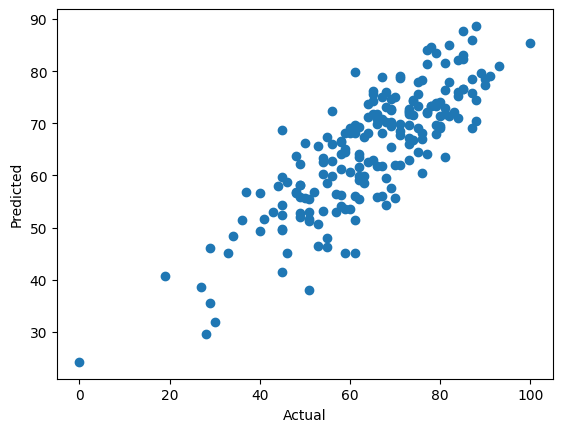

In [70]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

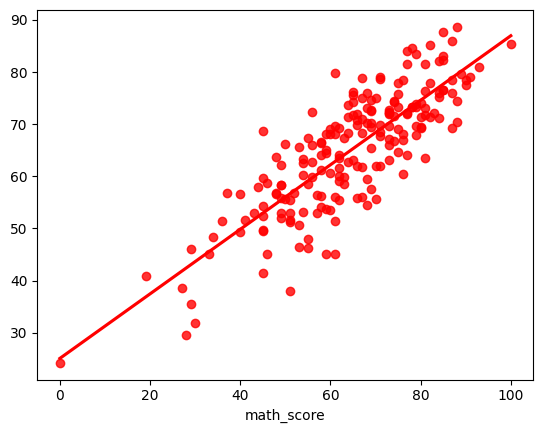

In [71]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [72]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,79.065573,11.934427
737,53,65.666143,-12.666143
740,80,69.198002,10.801998
660,74,71.591387,2.408613
411,84,76.017092,7.982908
...,...,...,...
408,52,56.759452,-4.759452
332,62,55.504541,6.495459
208,74,74.462273,-0.462273
613,65,71.830138,-6.830138
